# Assignment



You have two jars, where you can put water, with capacities cap_1 and cap_2 respectively. Your goal is to fill the jars with a given amount of water. The actions that you can perform are the following:

<ol type="1">
<li>    Fill 1: fill jar 1 to its maximum capacity with water.</li>
<li>    Fill 1: fill jar 2 to its maximum capacity with water.</li>
<li>    Empty 1: totally empty jar 1.</li>
<li>    Empty 2: totally empty jar 2.</li>
<li>    1 -> 2: pour the content of jar 1 into jar 2 until jar 1 is empty or jar 2 is full.</li>
<li>    2 -> 1: pour the content of jar 2 into jar 1 until jar 2 is empty or jar 1 is full.</li>

</ol>

In [1]:
import sys
sys.path
sys.path.append("/home/ajaque/Documents/Artificial Intelligence/pacman/Pacman-Agent/")

# Support libraries from EDx CS188
import util
import search

# Libraries and code for graph and tree visualization
from graphviz import Graph, Digraph
from IPython.display import display

## 1. Model the jars problem as a search problem

In [20]:
class jars_problem(search.SearchProblem):
    def __init__(self, cap_1, cap_2, goal):
        '''
        cap_1: jar 1 capacity
        cap_2: jar 2 capacity
        goal:  goal state
        '''
        self.expanded = 0
        self.cap_1 = cap_1
        self.cap_2 = cap_2
        self.start = (0, 0)
        self.goal = goal
        
    def getStartState(self):
        return self.start

    def isGoalState(self, state):
        return self.goal == state

    def getSuccessors(self, state):
        '''
        Receives a state and calculates the list of successors. Each successor 
        correspond a triple of the form (state, action, cost). 
        For instance for state = (0, 0) the list of successors could be:
        [((5, 0), "Fill 1", 5), ((0, 4), "Fill 2", 4)]
        '''
        successors = []
        #action 1
        if state[0] < self.cap_1 :
            successors.append(((self.cap_1, state[1]), "Fill 1", self.cap_1))
        #action 2
        if state[1] < self.cap_2 :
            successors.append(((state[0],self.cap_2), "Fill 2", self.cap_2))
        #action 3
        successors.append(((0,state[1]),"Empty 1", state[0]))
        #action 4
        successors.append(((state[0], 0),"Empty 2", state[1]))
        #action 5 1->2
        if state[0]+state[1] <= self.cap_2:
            successors.append(((0,state[0]+state[1]),"1->2", state[0]))
        else:
            successors.append(((state[0] - (self.cap_2-state[1]), self.cap_2),"1->2", self.cap_2-state[1]))
        #action 6 2->1
        if state[0]+state[1] <= self.cap_1:
            successors.append(((state[0]+state[1], 0),"2->1", state[1]))
        else:
            successors.append(((self.cap_1 ,state[1] - (self.cap_1-state[0])),"2->1",self.cap_1-state[0]))
        return successors


In [6]:
jp = jars_problem(5,3,(2,2))

In [7]:
print jp.getStartState()
print jp.getSuccessors((0,0))

(0, 0)
[((5, 0), 'Fill 1', 5), ((0, 3), 'Fill 2', 3), ((0, 0), 'Empty 1', 0), ((0, 0), 'Empty 2', 0), ((0, 0), '1->2', 0), ((0, 0), '2->1', 0)]


In [8]:
# Libraries and code for graph and tree visualization
from graphviz import Graph, Digraph
from IPython.display import display

class search_tree():
    def __init__(self):
        self.graph = Digraph(graph_attr = {'size':'9'})
        
    def addNode(self, name, label):
        self.graph.node(name, label)

    def addEdge(self, source, action, target):
        self.graph.edge(source, target, action)
    
    def getDot(self):
        return self.graph
    
def graphDot(g_prob, color):
    dot = Graph(graph_attr = {'size':'3.5'})
    for node in g_prob.G:
        if not node in color:
            dot.node(node)
        else:
            dot.node(node, style = 'filled', color = color[node])
    for n1 in g_prob.G:
        for n2 in g_prob.G[n1]:
            if n1 < n2:
                dot.edge(n1, n2)
    return dot


In [12]:
def general_ui_search(problem, frontier):
    visited = {}
    tree = search_tree()
    state = problem.getStartState()
#    display(graphDot(problem, visited))
    frontier.push((state, []))
    visited[state] = 'gray'
    while not frontier.isEmpty():
        u, actions = frontier.pop()
#        print 'Pop:', u 
        if problem.isGoalState(u):
            return  actions, tree
        for v, action, cost in problem.getSuccessors(u):
            if not v in visited:
                tree.addEdge(str(u), action, str(v))
                visited[v] = 'gray'
                frontier.push((v, actions + [action]))
#            display(graphDot(problem, visited))
#            display(tree.getDot())
        visited[u] = 'black'
    return [], tree

In [13]:
def bfs(problem):
    return general_ui_search(problem, util.Queue()) 

['Fill 1', '1->2', 'Empty 2']


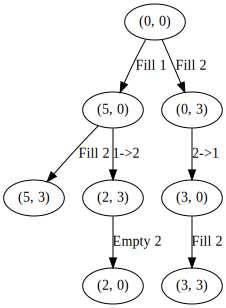

In [14]:
actions1, tree1 = bfs(jars_problem(5,3,(2,0)))
print actions1
display(tree1.getDot())

In [15]:
def dfs(problem):
    return general_ui_search(problem, util.Stack())

['Fill 2', '2->1', 'Fill 2', '2->1', 'Empty 1', '2->1', 'Fill 2', '2->1', 'Fill 2', '2->1', 'Empty 1', '2->1']


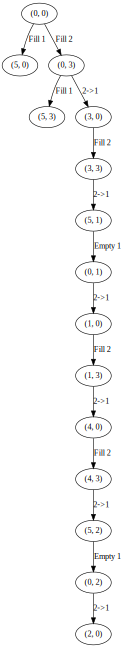

In [16]:
actions, tree = dfs(jars_problem(5,3,(2,0)))
print actions
display(tree.getDot())

In [17]:
def general_search(problem, frontier):
    visited = {}
    state = problem.getStartState()
    frontier.push((state, [], 0))
    tree = search_tree()
    tree.addNode(str(state)+"[]",str(state))
    while not frontier.isEmpty():
        u, actions, path_cost = frontier.pop()
        if problem.isGoalState(u):
            return  actions, tree
        if not u in visited:
            for v, action, cost in problem.getSuccessors(u):
                tree.addNode(str(v) + str(actions+[action]), str(v))
                tree.addEdge(str(u) + str(actions), str(cost), str(v) + str(actions+[action]))
                frontier.push((v, actions + [action], path_cost + cost))
        visited[u] = 'black'
    return [], tree

In [18]:
def uniformCostSearch(problem):
    def g_cost(item):
        return item[2]
    return general_search(problem, util.PriorityQueueWithFunction(g_cost)) 

['Fill 1', '1->2', 'Empty 2']
Expanded nodes: 0


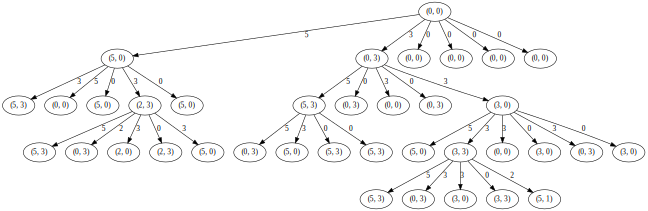

In [21]:
problem = jars_problem(5,3,(2,0))
actions1, tree1 = uniformCostSearch(problem)
print actions1
print "Expanded nodes:", problem.expanded
display(tree1.getDot())

In [26]:
def nullHeuristic(state):
    return 0

def aStarSearch(problem, heuristic=nullHeuristic):
    def f_cost(item):
        return item[2] + heuristic(item[0]) 
    return general_search(problem, util.PriorityQueueWithFunction(f_cost))     

['Fill 1', '1->2', 'Empty 2']
Expanded nodes: 0


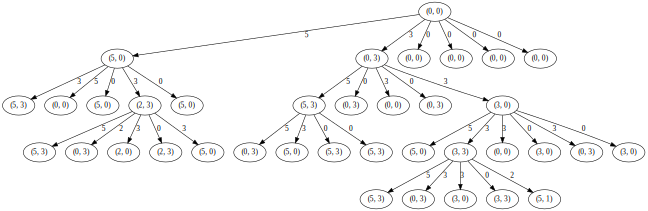

In [27]:
actions1, tree1 = aStarSearch(problem)
print actions1
print "Expanded nodes:", problem.expanded
display(tree1.getDot())

In [34]:
import math

def largestHeuristic(state, goal):
    return math.sqrt((state[0]-goal[0])**2+(state[1]-goal[1])**2)

def largestHeuristic2(state, goal):
    return abs((state[0]-goal[0])+(state[1]-goal[1]))

def aStarSearch2(problem, heuristic=largestHeuristic):
    def f_cost(item):
        return item[2] + heuristic(item[0], problem.goal) 
    return general_search(problem, util.PriorityQueueWithFunction(f_cost))

['Fill 1', '1->2', 'Empty 2']
Expanded nodes: 0


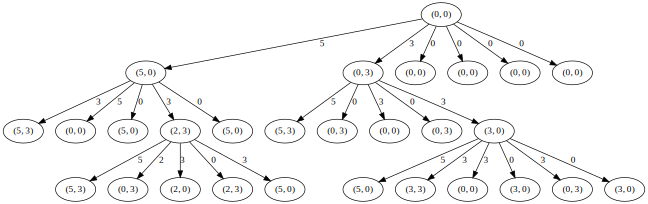

In [36]:
actions1, tree1 = aStarSearch2(problem, largestHeuristic)
print actions1
print "Expanded nodes:", problem.expanded
display(tree1.getDot())